教材：https://www.youtube.com/watch?v=4Vk1UhRDB34&list=PLS0ga_-CwEAryL5_Saiit6CIU1oZS7S4j&index=2

### K近傍法


In [5]:
import mglearn
import matplotlib.pyplot as plt
import matplotlib

#Matplotlib for Japanese and Jupyter notebook inline 
font = {"family":"Noto Sans CJK JP"}
matplotlib.rc('font', **font)
%matplotlib inline





/Users/me/Dev/.venv/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


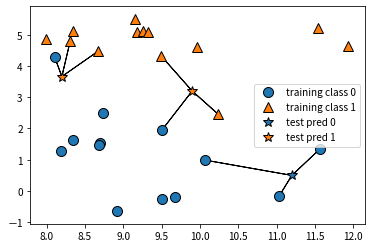

In [6]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [7]:
X , y = mglearn.datasets.make_forge()

/Users/me/Dev/.venv/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


In [8]:
X

array([[ 9.96346605,  4.59676542],
       [11.0329545 , -0.16816717],
       [11.54155807,  5.21116083],
       [ 8.69289001,  1.54322016],
       [ 8.1062269 ,  4.28695977],
       [ 8.30988863,  4.80623966],
       [11.93027136,  4.64866327],
       [ 9.67284681, -0.20283165],
       [ 8.34810316,  5.13415623],
       [ 8.67494727,  4.47573059],
       [ 9.17748385,  5.09283177],
       [10.24028948,  2.45544401],
       [ 8.68937095,  1.48709629],
       [ 8.92229526, -0.63993225],
       [ 9.49123469,  4.33224792],
       [ 9.25694192,  5.13284858],
       [ 7.99815287,  4.8525051 ],
       [ 8.18378052,  1.29564214],
       [ 8.7337095 ,  2.49162431],
       [ 9.32298256,  5.09840649],
       [10.06393839,  0.99078055],
       [ 9.50048972, -0.26430318],
       [ 8.34468785,  1.63824349],
       [ 9.50169345,  1.93824624],
       [ 9.15072323,  5.49832246],
       [11.563957  ,  1.3389402 ]])

In [9]:
X.shape

(26, 2)

In [10]:
y

array([1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0])

In [11]:
y.shape

(26,)

### データ可視化
- 散布図（x軸、y軸、グルーピング）

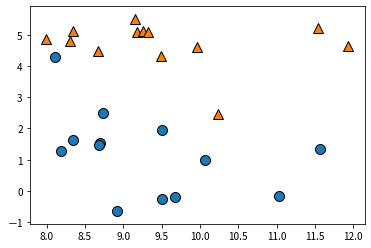

In [14]:
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.show()

### K近傍法

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split #訓練データとテストデータの分割用

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

In [20]:
X_train.shape

(19, 2)

In [22]:
X_test.shape

(7, 2)

In [23]:
clf = KNeighborsClassifier(n_neighbors=3)

In [24]:
clf.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [25]:
clf.predict(X_test)

array([1, 0, 1, 0, 1, 0, 0])

In [26]:
y_test

array([1, 0, 1, 0, 1, 1, 0])

In [27]:
clf.score(X_test,y_test)

0.8571428571428571

In [28]:
round(clf.score(X_test,y_test),3)

0.857

In [30]:
# print関数で小数点以下２桁のみ表示
print(f'{clf.score(X_test,y_test):.2f}')


0.86


In [33]:
# K最近傍法の値を変更する

clf_10 = KNeighborsClassifier(n_neighbors=10)
clf_10.fit(X_train,y_train)
clf_10.predict(X_test)

array([1, 0, 1, 0, 1, 0, 0])

In [34]:
clf_10.score(X_test,y_test)

0.8571428571428571

In [39]:
for n_neighbors in range(1,16):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X_train,y_train)
    print(f'Test set accuracy : n_neighbors={n_neighbors}',f'{clf.score(X_test,y_test):.3f}')
    

Test set accuracy : n_neighbors=1 0.857
Test set accuracy : n_neighbors=2 0.857
Test set accuracy : n_neighbors=3 0.857
Test set accuracy : n_neighbors=4 0.857
Test set accuracy : n_neighbors=5 0.857
Test set accuracy : n_neighbors=6 0.857
Test set accuracy : n_neighbors=7 0.857
Test set accuracy : n_neighbors=8 0.857
Test set accuracy : n_neighbors=9 0.857
Test set accuracy : n_neighbors=10 0.857
Test set accuracy : n_neighbors=11 0.857
Test set accuracy : n_neighbors=12 0.857
Test set accuracy : n_neighbors=13 0.857
Test set accuracy : n_neighbors=14 0.857
Test set accuracy : n_neighbors=15 0.857


In [40]:
# Kの境界線の引き方がどう変わったか
# alpha = 0.5 は透明度

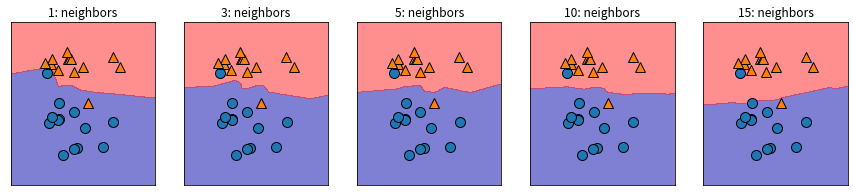

In [47]:
fig, axes = plt.subplots(1, 5, figsize=(15, 3))

for n_neighbors ,ax in zip([1, 3, 5, 10, 15],axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X_train,y_train)
    mglearn.plots.plot_2d_separator(clf,X,fill=True,ax=ax,alpha=0.5)
    mglearn.discrete_scatter(X[:,0],X[:,1],y,ax=ax)
    ax.set_title(f'{n_neighbors}: neighbors')

plt.show()

### 別のデータセットでK近傍法

In [48]:
from sklearn.datasets import load_breast_cancer

In [49]:
cancer = load_breast_cancer()

In [53]:
cancer.data.shape

(569, 30)

In [54]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [55]:
cancer.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [56]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

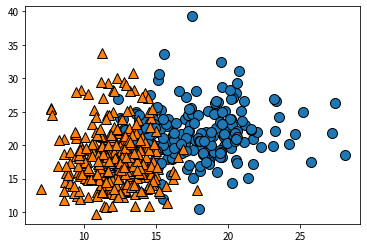

In [58]:
mglearn.discrete_scatter(cancer.data[:,0],cancer.data[:,1],cancer.target)
plt.show()

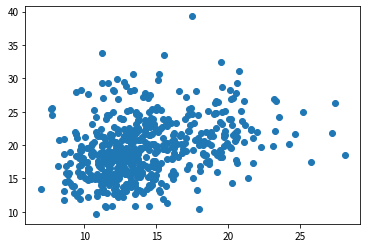

In [61]:
# pyplotで表示してみる　→　一緒の色になってしまう
plt.scatter(cancer.data[:,0],cancer.data[:,1])
plt.show()

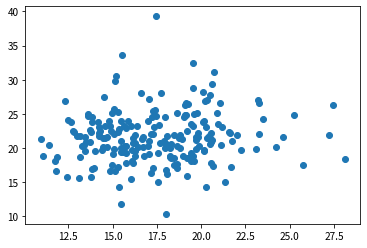

In [62]:
x_1_blue = cancer.data[:,0][cancer.target ==0] 
x_2_blue = cancer.data[:,1][cancer.target ==0]
plt.scatter(x_1_blue,x_2_blue)

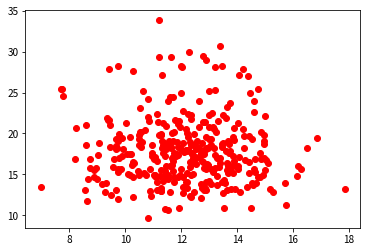

In [65]:
x_1_red = cancer.data[:,0][cancer.target ==1]
x_2_red = cancer.data[:,1][cancer.target ==1]
plt.scatter(x_1_red,x_2_red,color='red')

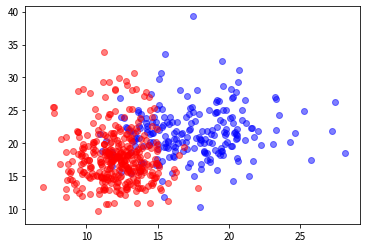

In [68]:
plt.scatter(x_1_blue,x_2_blue, color='blue',alpha=0.5)
plt.scatter(x_1_red,x_2_red,color='red',alpha=0.5)

In [70]:
import pandas as pd
df = pd.DataFrame(index=["a", "b", "c", "d", "e"],
                      columns=["A", "B", "C", "D"],
                      data=[[10, 5, 3, 1],[2, 4, 5, 2],
                            [1, 3, 4, 2],[1, 5, 3, 4],
                            [7, 6, 5, 4]]
                      )

In [78]:
df[['A']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, a to e
Data columns (total 1 columns):
A    5 non-null int64
dtypes: int64(1)
memory usage: 240.0+ bytes


In [77]:
df['A']

a    10
b     2
c     1
d     1
e     7
Name: A, dtype: int64